## RNN model 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import tensorflow as tf
import pickle
from tensorflow.keras.models import load_model

In [4]:
# Data Import 

# Load X_train
with open("data/X_train.pkl", "rb") as f:
    X_train = pickle.load(f)

# Load y_train
with open("data/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

# Load X_val
with open("data/X_val.pkl", "rb") as f:
    X_val = pickle.load(f)

# Load y_val
with open("data/y_val.pkl", "rb") as f:
    y_val = pickle.load(f)

# Load X_test
with open("data/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

# Load y_test
with open("data/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

In [18]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    #train_rmse = history.history['root_mean_squared_error']
    #val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    #plt.figure(figsize=(20, 10))
    #plt.subplot(1, 2, 1)
    #plt.plot(train_rmse, label='Training RMSE')
    #plt.plot(val_rmse, label='Validation RMSE')
    #plt.legend()
    #plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

In [10]:
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(32, input_shape=(None, X_train.shape[2])),
    Dropout(0.1)
    tf.keras.layers.Dense(1)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("rnn_1.h5", monitor= "val_loss", save_best_only=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=6e-3, amsgrad=True)

rnn_model.compile(optimizer=optimizer, loss='mse')
history = rnn_model.fit(X_train, y_train, epochs=50, validation_data = (X_val, y_val), batch_size=32, verbose=1, callbacks = [early_stopping, model_checkpoint])


Epoch 1/50
845/845 [==============================] - 29s 31ms/step - loss: 0.0084 - val_loss: 0.0014
Epoch 2/50
845/845 [==============================] - 50s 59ms/step - loss: 0.0020 - val_loss: 9.1024e-04
Epoch 3/50
845/845 [==============================] - 37s 43ms/step - loss: 0.0013 - val_loss: 8.4322e-04
Epoch 4/50
845/845 [==============================] - 27s 32ms/step - loss: 0.0011 - val_loss: 8.4327e-04
Epoch 5/50
845/845 [==============================] - 46s 55ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 6/50
845/845 [==============================] - 34s 40ms/step - loss: 9.9788e-04 - val_loss: 9.0027e-04
Epoch 7/50
845/845 [==============================] - 28s 33ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 8/50
845/845 [==============================] - 23s 27ms/step - loss: 9.9451e-04 - val_loss: 0.0012
Epoch 9/50
845/845 [==============================] - 41s 48ms/step - loss: 9.8298e-04 - val_loss: 6.4217e-04
Epoch 10/50
845/845 [=============================

In [17]:
rnn_model = load_model("rnn_1.h5")
predictions = rnn_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.4f}')

125/125 [==============================] - 2s 13ms/step
RMSE: 0.0204


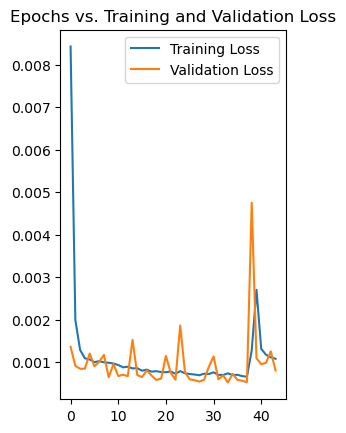

In [19]:
plot_model_rmse_and_loss(history)

In [7]:
print(X_train.shape)

(27024, 24, 17)
